<a href="https://colab.research.google.com/github/dotinspiredby/Anti-Parallelism-/blob/main/Grader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade music21

     |████████████████████████████████| 19.2 MB 1.3 MB/s 
  Created wheel for music21: filename=music21-6.7.1-py3-none-any.whl size=21941718 sha256=6dd99a0f8c52086be3a3fca2b4a5b62f7a349108b6e7b4f84c84c9f5ecf43c1d
  Stored in directory: /root/.cache/pip/wheels/72/44/61/90e4e65262ca1b4d9f707527b540729ce3f64e00fc6b38d54c
Successfully built music21
  Attempting uninstall: music21
    Found existing installation: music21 5.5.0
    Uninstalling music21-5.5.0:
      Successfully uninstalled music21-5.5.0


In [2]:
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu 

In [3]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 86 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 784 kB in 1s (1,049 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 161803 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.9_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.9) ...
Setting up xvfb (2:1.19.6-1ubuntu4.9) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
!sh -e /etc/init.d/x11-common start

 * Setting up X socket directories...
   ...done.


In [5]:
import os
os.putenv('DISPLAY', ':99.0')

In [6]:
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset

In [7]:
from music21 import environment
us = environment.UserSettings()
us['musicxmlPath'] = '/usr/bin/mscore'
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/testx.xml
voice crossing in measure 1, note position 1.0 Alto-v0 Soprano-v0
voice crossing in measure 1, note position 1.5 Alto-v0 Soprano-v0
voice crossing in measure 1, note position 0.0 Alto-v0 Soprano-v0
hidden parallel fifths in measure 2   note position 0.0  Alto-v0 Soprano-v0
hidden parallel fifths in measure 2   note position 2.0  Tenor-v0 Soprano-v0
parallel octaves in measure 1   note position 1.5  Bass-v0 Soprano-v0
hidden parallel octaves in measure 1   note position 2.0  Bass-v0 Soprano-v0
hidden parallel fifths in measure 2   note position 0.0  Bass-v0 Soprano-v0
parallel octaves in measure 2   note position 2.0  Tenor-v0 Alto-v0
hidden parallel fifths in measure 1   note position 2.5  Tenor-v0 Alto-v0
hidden parallel octaves in measure 4   note position 0.0  Tenor-v0 Alto-v0
hidden parallel octaves in measure 1   note position 2.0  Bass-v0 Alto-v0
hidden parallel octaves in measure 2   note position 0.0  Bass-v0 Alto-v0
hidden parallel fifths in me

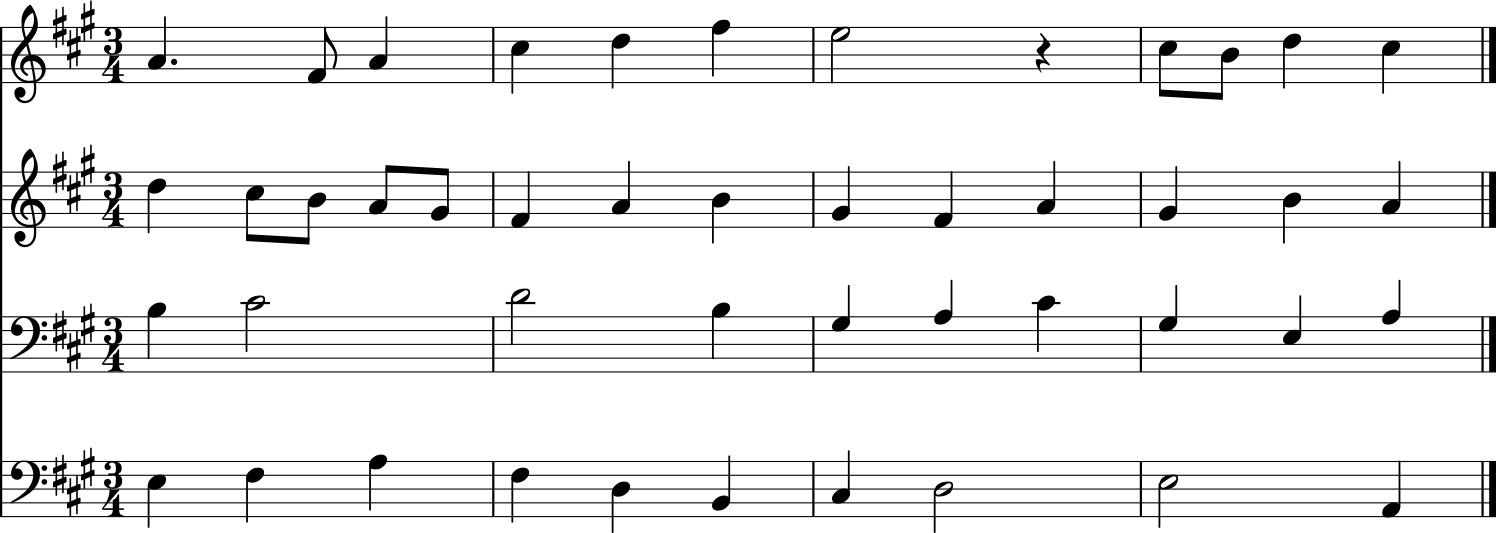

In [9]:
from music21 import converter, stream


class Grader:
    def __init__(self, link):

        self.link = link

        self.soprano = None
        self.alto = None
        self.tenor = None
        self.bass = None

        self.test_score = self._distribute_voices()

    def _distribute_voices(self):
        test = converter.parse(self.link)
        return test.voicesToParts()

    def run(self):
        names = self.__output_name()
        try:
            self.soprano, self.alto, self.tenor, self.bass = self._split_into_parts(names)

            self.__get_intervals_and_check(self.alto, self.soprano)
            self.__get_intervals_and_check(self.tenor, self.soprano)
            self.__get_intervals_and_check(self.bass, self.soprano)
            self.__get_intervals_and_check(self.tenor, self.alto)
            self.__get_intervals_and_check(self.bass, self.alto)
            self.__get_intervals_and_check(self.bass, self.tenor)
        except ValueError:
            print("expected 4 voices in file, got %s" % len(list(self._split_into_parts(names))))

    def __output_name(self):
        names = []
        instrument_obj = self.test_score.recurse().getElementsByClass(stream.Part)
        for n in instrument_obj:
            try:
                int(n.id[:-3])
            except ValueError:
                names.append(n.id)
        return names

    def _split_into_parts(self, ids):
        for part_id in ids:
            yield self.test_score.parts[part_id]

    @staticmethod
    def __make_interval_list(voice_a, voice_b, direction, vc_abr, verdct):
        interval_list = []
        for measure_index in range(len(voice_a.elements)):
            measure_intervals = []
            voice_a.elements[measure_index].flat.attachIntervalsBetweenStreams(
                voice_b.elements[measure_index].flat)
            for n in voice_a.elements[measure_index].notes:
                if n.editorial.harmonicInterval is None:
                    pass
                else:

                    if direction == "down" and "-" not in n.editorial.harmonicInterval.directedName:
                        if n.editorial.harmonicInterval.directedName != "P1":
                            verdct.add("voice crossing in measure {0}, note position {1} {2} {3}".format(
                                measure_index + 1, n.offset, vc_abr[0].id, vc_abr[1].id))
                            #print("voice crossing {0} in measure {1}".format(vc_abr, measure_index + 1))

                    elif direction == "up" and "-" in n.editorial.harmonicInterval.directedName:
                        verdct.add("voice crossing in measure {0}, note position {1} {2} {3}".format(
                            measure_index + 1, n.offset, vc_abr[0].id, vc_abr[1].id))
                        #print("voice crossing {0} in measure {1}".format(vc_abr, measure_index + 1))

                    if "-" in n.editorial.harmonicInterval.directedName:
                        measure_intervals.append(
                            (n.editorial.harmonicInterval.directedName.replace("-", ""), n.offset))
                    else:
                        measure_intervals.append((n.editorial.harmonicInterval.directedName, n.offset))
            interval_list.append(measure_intervals)
        return interval_list

    @staticmethod
    def __fill(list_a, list_b):
        set_superposed = set()
        try:
            for item in list_a:
                set_superposed.add(item)
            for item in list_b:
                set_superposed.add(item)
            to_return = list(set_superposed)
            to_return.sort(key=lambda x: x[1])
            return to_return
        except TypeError:
            return []

    @staticmethod
    def __merge(intervals_input):
        itval_line = []
        for line in intervals_input:
            for interval in line:
                itval_line.append(interval)
        return itval_line

    @staticmethod
    def __order_by_offset(part, measure_number, offset):
        obj = part.measure(measure_number)
        try:
            to_find = obj.getElementsByOffset(offset, mustBeginInSpan=False)  # sometimes returns rests
            return list(to_find.notes)

        except IndexError:
            # offset may not exist - the note is longer, rested or out of range
            return None

    @staticmethod
    def _check_equal(n1, n2):
        if n1.pitch == n2.pitch:
            return False
        return True

    def check(self, intervals, intervals_offset, vc_abr, step, index_map, info=''):
        for i in range(len(intervals) - int(step)):
            fifths = ['P5', 'P12', 'P19']
            octaves = ['P1', 'P8', 'P15']

            type_of_error = ""
            if intervals[i] in fifths and intervals[i + step] in fifths:  # interval_list in the past
                type_of_error = "fifths"
            elif intervals[i] in octaves and intervals[i + step] in octaves:
                type_of_error = "octaves"
            else:
                pass
            if type_of_error:
                measure_num = 0
                for interval_num in index_map:
                    if i < interval_num:
                        measure_num = index_map.index(interval_num) + 1
                        break
                measure_num2 = measure_num
                if intervals_offset[i + step] <= intervals_offset[i]:
                    measure_num2 += 1
                try:
                    note_u_a = self.__order_by_offset(vc_abr[0], measure_num, intervals_offset[i])[0]
                    note_u_b = self.__order_by_offset(vc_abr[0], measure_num2, intervals_offset[i + step])[0]
                    note_d_a = self.__order_by_offset(vc_abr[1], measure_num, intervals_offset[i])[0]
                    note_d_b = self.__order_by_offset(vc_abr[1], measure_num2, intervals_offset[i + step])[0]
                    if self._check_equal(note_u_a, note_u_b) is True and self._check_equal(note_d_a, note_d_b) is True:
                        print(
                            '%s' % info + 'parallel %s' % type_of_error + ' in measure %s ' % measure_num,
                            ' note position %s ' % intervals_offset[i], vc_abr[0].id, vc_abr[1].id)
                    else:
                        pass  # case of repetitive notes
                except IndexError:
                    pass  # caught the <note.Rest> instead of pitched note.Note

    def __get_intervals_and_check(self, voice_1, voice_2):
        verdict = set()
        intrvls_up_down = self.__make_interval_list(voice_1, voice_2, "up",
                                                    [voice_1, voice_2], verdict)
        intrvls_down_up = self.__make_interval_list(voice_2, voice_1, "down", [voice_1, voice_2], verdict)
        if verdict:
            print(*verdict, sep='\n')

        interval_list = []
        interval_list_offset = []
        beats = []
        beat_num = 0
        for cell in range(len(intrvls_up_down)):  # вписать контекст
            measure = []
            measure_offset = []
            measure_paired = self.__fill(intrvls_down_up[cell], intrvls_up_down[cell])

            if measure_paired is not None:
                for pair in measure_paired:
                    measure.append(pair[0])
                    measure_offset.append(pair[1])

                beat_num += len(measure)
            else:
                pass
            interval_list.append(measure)
            interval_list_offset.append(measure_offset)
            beats.append(beat_num)

        interval_line = self.__merge(interval_list)
        interval_line_offset = self.__merge(interval_list_offset)
        self.check(interval_line, interval_line_offset, [voice_1, voice_2], 1, beats)
        self.check(interval_line, interval_line_offset, [voice_1, voice_2], 2, beats, 'hidden ')



if __name__ == "__main__":
    file_link = str(input())
    path = Grader(file_link)
    path.run()
    path.test_score.show()